# KNN implementation on the MNIST

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()

In [3]:
with open('mnist-y.data') as file:  #6000 labels
    chars = [line[0] for line in file]

In [4]:
vectors = []  #list of vectors
with open('mnist-x.data') as file:   #6000 vectors of 784 components(28*28), all 0 or 1
    for line in file:
        vectors.append([1.0 if float(v) == 1 else -1.0 for v in line.strip().split(',')]) #turn 1 in 1 and 0 in -1

<Figure size 640x480 with 0 Axes>

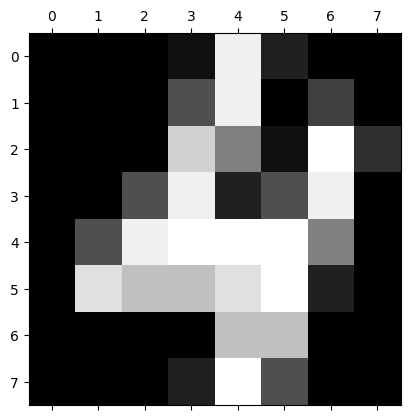

In [5]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1001])
plt.show()

In [6]:
digits['data'] = np.where(digits['data']>0,1,-1)

In [7]:
vectors = np.array(vectors)

In [8]:
vectors.shape

(6000, 784)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(vectors,chars,test_size=0.20, random_state=42)

In [10]:
X_train.shape

(4800, 784)

In [11]:
X_test.shape

(1200, 784)

# Trying to implement KNN

In [12]:
def predict(X_train, X_test, y_train, K):
    closest_class = []
    for i in range(len(X_test)):
        # Calcular la distancia euclidiana entre el punto actual de prueba y todos los puntos de entrenamiento
        distances = np.sqrt(np.sum((X_train - X_test[i])**2, axis=1))
        # Seleccionar los K vecinos más cercanos despues de ordenar las distancias obtenidas de menor a mayor
        K_nearest_indices = np.argsort(distances)[:K]
        #Convertir y_train en array para poder indexar de acuerdo a los KNN
        K_nearest_classes = np.array(y_train)[K_nearest_indices].astype(int)
        # Calcular la clase mas repetida entre los K vecinos más cercanos
        majority_class = np.argmax(np.bincount(K_nearest_classes))
        closest_class.append(majority_class)
    return closest_class

In [ ]:
# result = predict(X_train, X_test, y_train, K=5)

In [15]:
def test3(K_values, y_test):
    accuracy_values = []
    #Para los valores que queramos de K
    for K in K_values:
        print("K =", K)
        #Iniciar contador
        success = 0
        #Predecir para los puntos de prueba y comparar con los labels de los puntos de prueba
        predicted_classes = predict(X_train, X_test, y_train, K)
        for i in range(len(X_test)):
            if predicted_classes[i] == int(y_test[i]):
                success += 1
        #Calcular el porcentaje de predicciones correctas
        accuracy = float(success) / len(X_test)
        accuracy_values.append(accuracy)
        print("Accuracy:", accuracy)

In [16]:
K_values = [1, 2, 5, 10, 15, 20, 25, 50, 100]
test3(K_values, y_test)

K = 1
Accuracy: 0.9325
K = 2
Accuracy: 0.9116666666666666
K = 5
Accuracy: 0.9208333333333333
K = 10
Accuracy: 0.9116666666666666
K = 15
Accuracy: 0.9033333333333333
K = 20
Accuracy: 0.8983333333333333
K = 25
Accuracy: 0.8933333333333333
K = 50
Accuracy: 0.865
K = 100
Accuracy: 0.825


## Prostate

In [17]:
import pandas as pd

https://search.r-project.org/CRAN/refmans/Brq/html/Prostate.html

In [19]:
prostate_data = pd.read_csv('prostate.csv')
prostate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


Divide the data set, and apply the K-NN. Test the accuracy, the training error, and the test error.

In [20]:
prostate_train, prostate_test = train_test_split(prostate_data,test_size=0.20, random_state=42)

# Perceptron

In [ ]:
# data = [{'vector': v, 'char': c} for (v, c) in zip(vectors, chars)]

In [ ]:
# def train(target_char, opposite_char, steps):
#     train_data = data[:5000]
#     train_data = [e for e in train_data if e['char'] in (target_char, opposite_char)]
#     w = np.zeros(784)
#     i = 0
#     weights = w
#     # Implement perceptron, remember:
#     if z >= 0 and y == opposite_char:
#         #TODO
#     elif z < 0 and y == target_char:
#         #TODO
#     return w

# def error(target_char, opposite_char,data,w):
#     success = 0
#     for e in data:
#         z = np.dot(e['vector'], w)
#         if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
#             success += 1
#     return float(success) / len(data)

# def test(target_char, opposite_char,weights):
#     success = 0
#     examples = data[5000:]

#     examples = [e for e in examples if e['char'] in (target_char, opposite_char)]

#     for e in examples:
#         z = np.dot(e['vector'], weights)
#         if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
#             success += 1

#     return float(success) / len(examples)

In [ ]:
# weights = train('1','2',100)

In [ ]:
# test('1','2',weights)